## Entropy Estimation

### Plug in Entropy

위치 1에서 시작해 n에서 끝나는 문자열로 이뤄진 데이터의 시퀀스 $x_1^n$이 주어질 때 이 문자열에서 길이가 $w<n$인 모든 단어의 사전 $A^w$를 구성할 수 있다. 길이가 $w$인 임의의 단어 $y_1^w \in A^w$를 고려해 보자. $\hat{y}_w[y_1^w]$을 $x_1^n$에서 단어 $y_1^w$의 경험적 확률이라 표기하자. 즉 $\hat{y}_w[y_1^w]$는 $x_1^n$에서 $y_1^w$가 등장하는 빈도를 의미한다. 데이터가 정상성이고 ergodic process에서 생성되었다고 가정하면 대수의 법칙에 의해 고정된 $w$와 큰 수 $n$에 대해 경험적 분포 $\hat{y}_w$는 참 분포 $p_w$에 근접한다. 이런 환경에서 Entropy 비율에 대한 자연스러운 추정량은 다음과 같다.

$$\hat{H}_{n,w} = -\frac{1}{w} \sum_{y_1^w \in A^w} \hat{p}_w[y_1^w] \log_2 \hat{p}_w [y_1^w]$$

경험적 분포도 참 분포의 최대 우도 추정이므로 종종 최대 우도 엔트로피 추정량(Maximum Likelihood Entropy Estimator)이라 불리기도 한다. $\hat{H}_{n,w}$가 참 $H$에 만족할 만큼 근접하도록 값 $w$는 충분히 커야 한다. $w$차원의 경험적 분포가 참 분포에 근접하도록 $n$값은 $w$보다 훨씬 더 커야 한다. 아래의 과정은 Plug in Entropy 추정량을 구현하는 과정이다.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from FinancialMachineLearning.features.entropy import *

data = yf.download('SPY', start = '2000-01-01', end = pd.to_datetime('today'))
data.index = pd.to_datetime(data.index)

[*********************100%%**********************]  1 of 1 completed


In [20]:
data['return'] = data['Adj Close'].pct_change()

In [21]:
data.loc[data['return'] > 0, 'bin'] = 1
data.loc[data['return'] <= 0, 'bin'] = 0

In [28]:
data['plug in entropy'] = data['bin'].rolling(window = 252).apply(
    lambda x : plug_in_entropy(x)
)

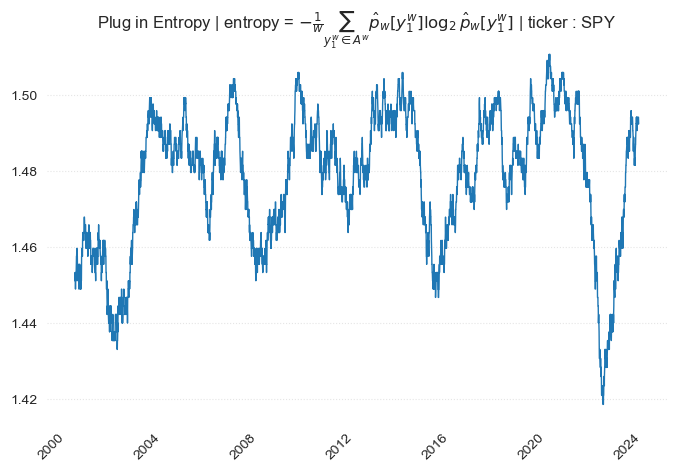

In [33]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    data['plug in entropy'].index,
    data['plug in entropy'],
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(r'Plug in Entropy | entropy = $-\frac{1}{w} \sum_{y_1^w \in A^w} \hat{p}_w[y_1^w] \log_2 \hat{p}_w [y_1^w]$ | ticker : SPY')
plt.show()

### Lempel-Ziv Estimator

엔트로피는 복잡도의 척도로 해석할 수 있다. 복잡한 시퀀스는 규칙적인 시퀀스에 비해 훨씬 더 많은 정보를 담고 있다. 

In [47]:
data['lempel-ziv entropy'] = data['bin'].rolling(window = 252).apply(
    lambda x : lempel_ziv_entropy(''.join(x.astype(str).tolist()))
)

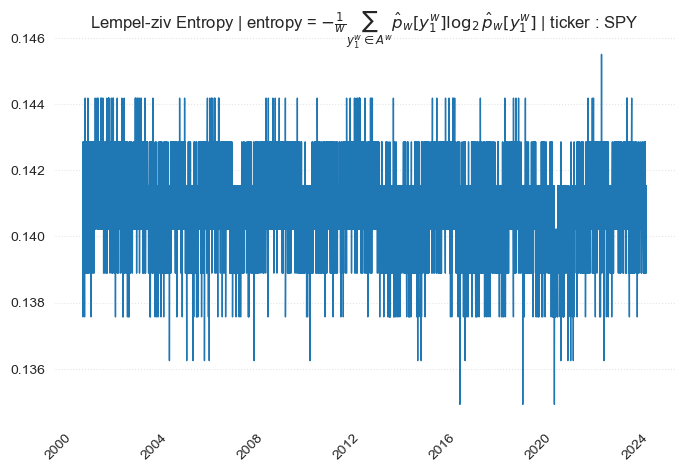

In [51]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    data['lempel-ziv entropy'].index,
    data['lempel-ziv entropy'],
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.xticks(rotation = 45)
plt.title(r'Lempel-ziv Entropy | entropy = $-\frac{1}{w} \sum_{y_1^w \in A^w} \hat{p}_w[y_1^w] \log_2 \hat{p}_w [y_1^w]$ | ticker : SPY')
plt.show()